In [1]:
import numpy as np
import tensorflow as tf
#
from sklearn.datasets import load_files
from keras.utils import np_utils
#
import os
from sklearn.preprocessing import OneHotEncoder
#
import pandas as pd
#
from PIL import Image
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
from MyLibraries.my_utilities import *

In [3]:
objTrain = C_Image()
objTrain.add_folder_info('data/train/melanoma', 1)
objTrain.add_folder_info('data/train/nevus', 2)
objTrain.add_folder_info('data/train/seborrheic_keratosis', 3)
objTrain.get_one_hot_labels()
objTrain.print_info()

number of files        =  2000
size   of labels_one_hot =  (2000, 3)


In [4]:
#　画像データの読み込み　PIL
img        = Image.open(objTrain.file_paths[0])
img_array  = np.asarray(img)
img_resize = img.resize((256, 256))
img_resize_array= np.asarray(img_resize)
print(img_array.shape)
print(img_resize_array.shape)

(767, 1022, 3)
(256, 256, 3)


(767, 1022, 3)


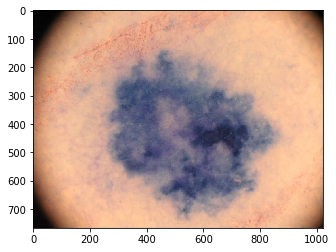

In [5]:
img = cv2.imread( objTrain.file_paths[0] )
plt.imshow(img)
print(img.shape)

(255, 255, 3)


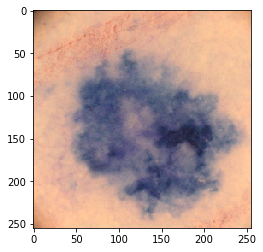

In [6]:
img2 = crop_to_square(img, position='center')
img3 = cv2.resize(img2, (255,255))
plt.imshow(img3)
print(img3.shape)

In [7]:
img4 = img3.reshape(1,255,255,3)
print(img4.shape)

(1, 255, 255, 3)


In [8]:
train_images = paths_to_tensor(objTrain.file_paths).astype('float32')/255
print(type(train_images))
print(train_images.shape)

100%|██████████| 2000/2000 [03:22<00:00,  9.88it/s]


<class 'numpy.ndarray'>
(2000, 224, 224, 3)


In [12]:
np.max( train_images[0] )

1.0